In [2]:
!pip install sklearn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests

import matplotlib
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.patches import Ellipse

from collections import Counter

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

print("Done")

Done


In [4]:
nba = pd.read_csv('nbads.csv')

In [5]:
nba.head()

,#,Season Start,Player Name,Player Salary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24304,2017,A.J. Hammons,"1,312,611.00",C,24,DAL,22,0,163,...,0.450,8,28,36,4,1,13,10,21,48
1,24165,2017,Aaron Brooks,"2,116,955.00",PG,32,IND,65,0,894,...,0.800,18,51,69,125,25,9,66,93,322
2,24289,2017,Aaron Gordon,"5,504,420.00",SF,21,ORL,80,72,2298,...,0.719,116,289,405,150,64,40,89,172,1019
3,24315,2017,Aaron Harrison,NaN,SG,22,CHO,5,0,17,...,0.500,0,3,3,3,0,0,0,2,1
4,24523,2017,Adreian Payne,NaN,PF,25,MIN,18,0,135,...,0.737,9,24,33,7,8,7,8,32,63


In [6]:
nba.describe()

,#,Season Start,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,486.000000,486.0,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,485.000000,485.000000,...,471.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,24392.170782,2017.0,26.405350,53.783951,25.308642,1223.051440,13.020782,0.526944,0.314058,0.270179,...,0.741155,51.329218,168.962963,220.292181,114.522634,38.997942,24.041152,67.691358,100.720165,534.471193
std,171.748286,0.0,4.345194,24.835638,28.715875,842.438143,5.762420,0.089771,0.209748,0.180287,...,0.139453,57.476904,148.262162,198.675410,134.125263,32.692854,29.254771,62.423127,66.589277,487.642042
min,24096.000000,2017.0,19.000000,1.000000,0.000000,1.000000,-17.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24242.250000,2017.0,23.000000,35.250000,1.000000,449.500000,9.800000,0.502000,0.156000,0.165000,...,0.675000,11.000000,48.500000,64.750000,23.250000,13.000000,5.000000,20.000000,41.250000,143.000000
50%,24392.500000,2017.0,26.000000,62.500000,11.000000,1197.500000,12.800000,0.537000,0.324000,0.237000,...,0.766000,31.500000,142.000000,178.000000,72.000000,33.000000,15.000000,55.000000,102.500000,434.500000
75%,24541.750000,2017.0,29.000000,75.000000,49.750000,1942.250000,15.800000,0.576000,0.455000,0.339000,...,0.832000,68.750000,234.750000,305.750000,150.750000,56.750000,32.000000,98.000000,149.000000,772.750000
max,24690.000000,2017.0,40.000000,82.000000,82.000000,3048.000000,31.500000,0.799000,1.000000,2.000000,...,1.000000,345.000000,817.000000,1116.000000,906.000000,157.000000,214.000000,464.000000,278.000000,2558.000000


In [7]:
nba['Player Salary'] = nba['Player Salary'].str.replace(',', '')
nba['Player Salary'].fillna(0, inplace=True)
nba['Player Salary'] = nba['Player Salary'].astype(float)
nba.head()

,#,Season Start,Player Name,Player Salary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24304,2017,A.J. Hammons,1312611.0,C,24,DAL,22,0,163,...,0.450,8,28,36,4,1,13,10,21,48
1,24165,2017,Aaron Brooks,2116955.0,PG,32,IND,65,0,894,...,0.800,18,51,69,125,25,9,66,93,322
2,24289,2017,Aaron Gordon,5504420.0,SF,21,ORL,80,72,2298,...,0.719,116,289,405,150,64,40,89,172,1019
3,24315,2017,Aaron Harrison,0.0,SG,22,CHO,5,0,17,...,0.500,0,3,3,3,0,0,0,2,1
4,24523,2017,Adreian Payne,0.0,PF,25,MIN,18,0,135,...,0.737,9,24,33,7,8,7,8,32,63


# Maximo Salario

In [8]:
nbamaxsal = nba[nba['Player Salary']==nba['Player Salary'].max()]

# Histogramas

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


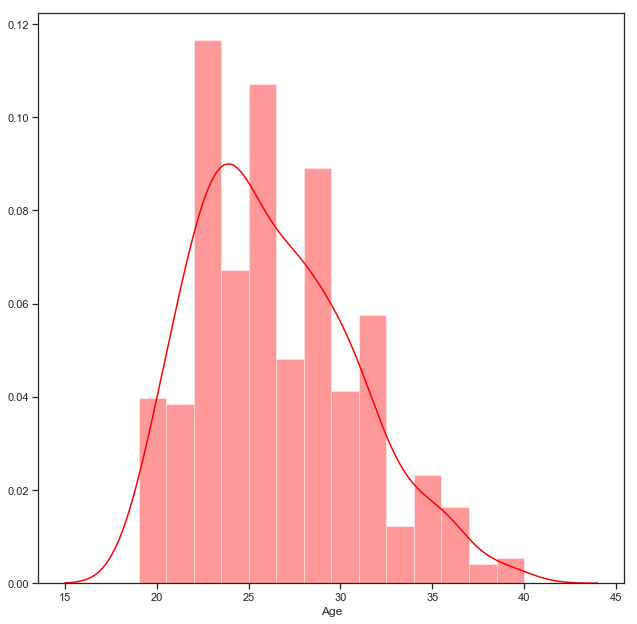

In [184]:
sns.distplot( nba["Age"] , color="red", label="Age")

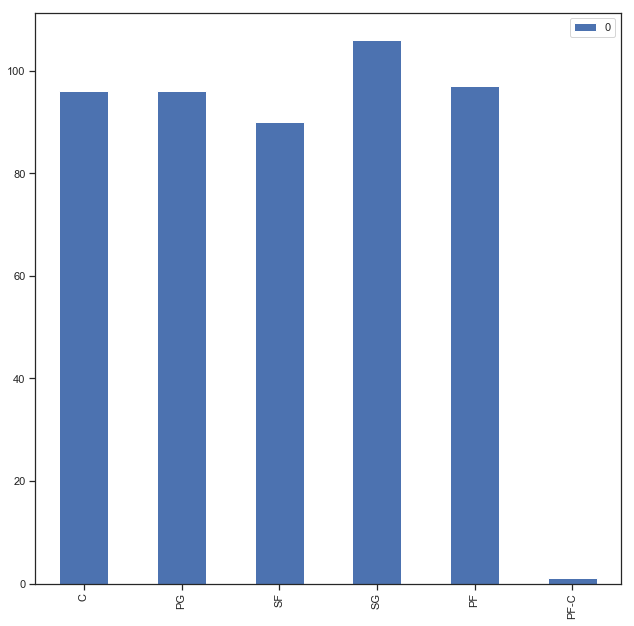

In [185]:
Position = nba.Pos
posscounter = Counter(Position)
count = pd.DataFrame.from_dict(posscounter, orient='index')
count.plot(kind='bar')

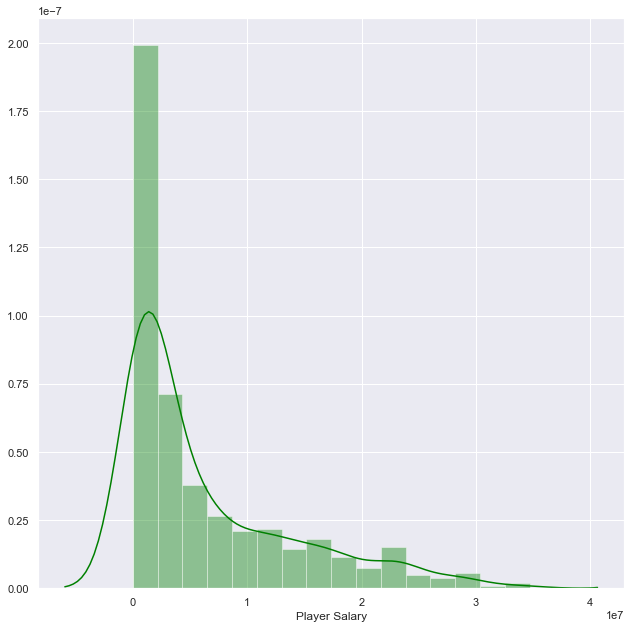

In [277]:
sns.distplot( nba["Player Salary"] , color="green", label="Salary")

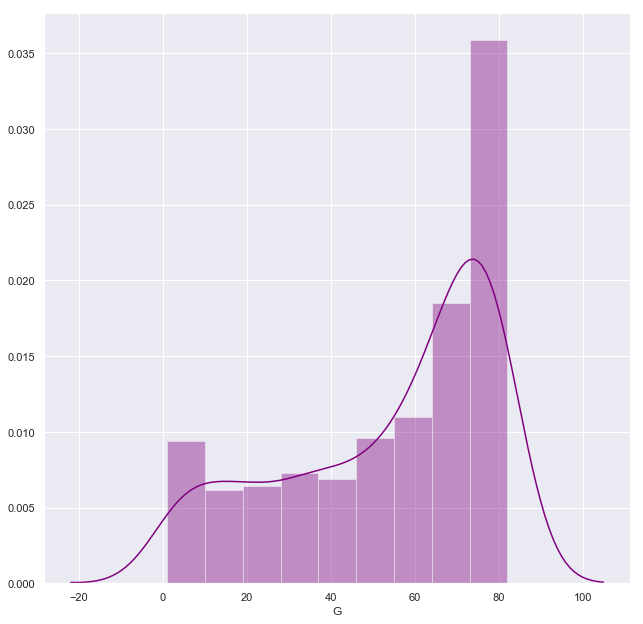

In [276]:
sns.distplot( nba["G"] , color="purple", label="Games")

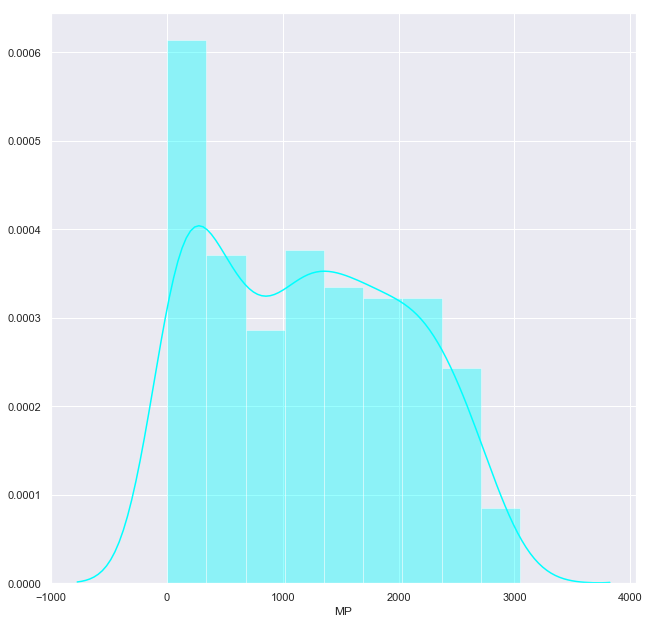

In [283]:
sns.distplot( nba["MP"] , color="cyan", label="Minutes Played")

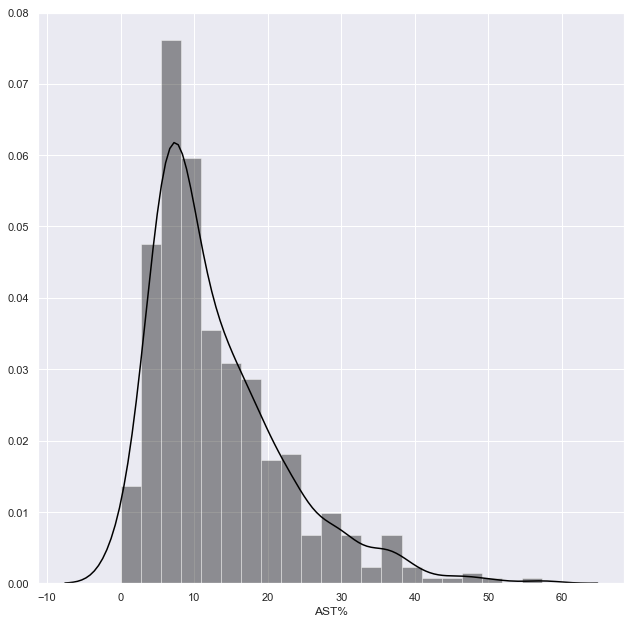

In [282]:
sns.distplot( nba["AST%"] , color="black", label="Assist percentage")

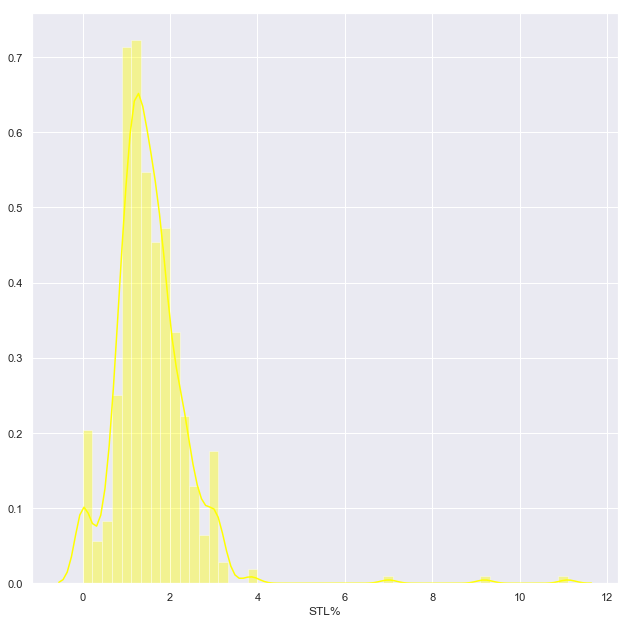

In [281]:
sns.distplot( nba["STL%"] , color="yellow", label="Steal Percentage")

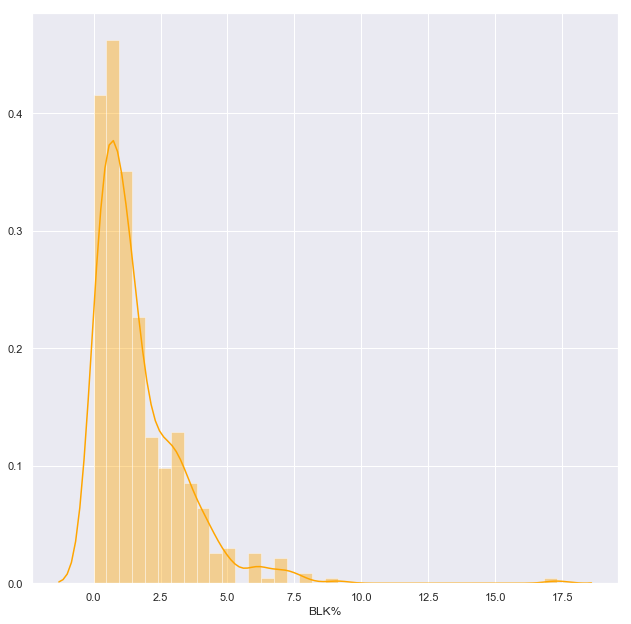

In [280]:
sns.distplot( nba["BLK%"] , color="orange", label="Block Percentage")

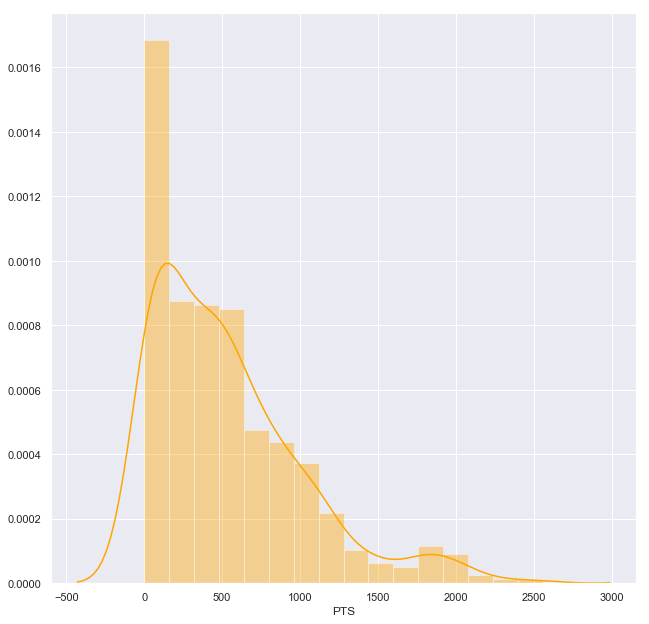

In [12]:
sns.distplot( nba["PTS"] , color="pink", label="Points")

In [11]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={"figure.figsize":(10.5,10.5)})

# DataSet con datos relevantes

In [9]:
nbanum = nba[['Age','G','Player Salary', 'GS', 'MP', 'PER', 'ORB%', 'DRB%', 'TRB%','AST%','STL%','BLK%']]
nbanum.head(2)

,Age,G,Player Salary,GS,MP,PER,ORB%,DRB%,TRB%,AST%,STL%,BLK%
0,24,22,1312611.0,0,163,8.4,5.4,20.9,12.8,3.8,0.3,7.2
1,32,65,2116955.0,0,894,9.5,2.3,6.3,4.3,20.7,1.4,0.9


# HeatMap

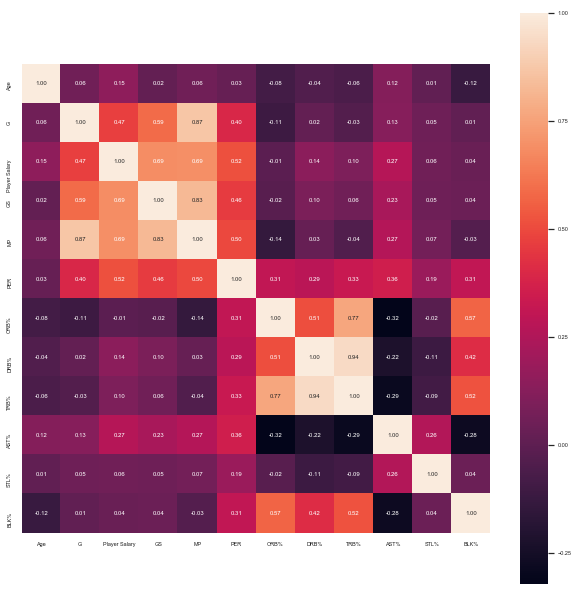

In [16]:
cols = list(nbanum)
cm = np.corrcoef(nbanum.values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", yticklabels=cols, xticklabels=cols)

# ScatterPlots y Predicciones

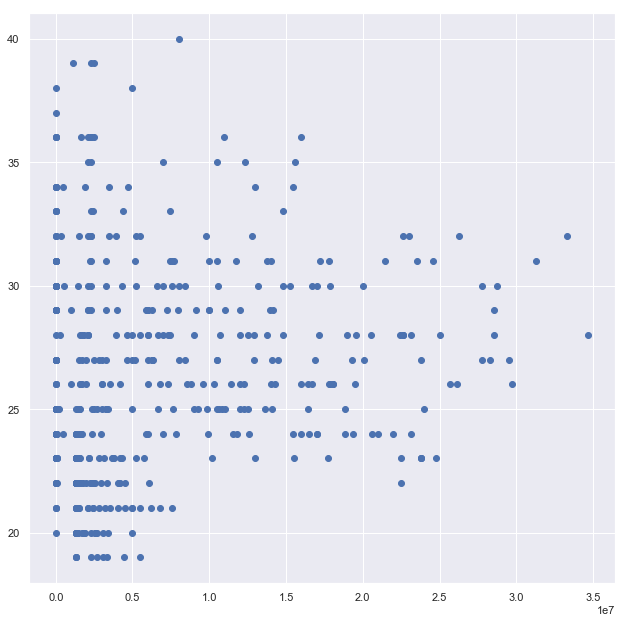

In [12]:
x = nba["Player Salary"].values.reshape(-1,1)
y = nba["Age"].values.reshape(-1,1)

plt.scatter(x, y)
plt.show()

In [18]:
salarybyage = nba[['Player Salary', 'Age', 'Player Name']]
salarybyage.sort_values(by='Player Salary', ascending=False)
salarybyage.head()

,Player Salary,Age,Player Name
0,1312611.0,24,A.J. Hammons
1,2116955.0,32,Aaron Brooks
2,5504420.0,21,Aaron Gordon
3,0.0,22,Aaron Harrison
4,0.0,25,Adreian Payne


In [19]:
mod = sm.OLS(y, x).fit()
predictions = mod.predict(x)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     361.4
Date:                Thu, 14 Feb 2019   Prob (F-statistic):           1.26e-60
Time:                        12:41:35   Log-Likelihood:                -2151.7
No. Observations:                 486   AIC:                             4305.
Df Residuals:                     485   BIC:                             4310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.769e-06   9.31e-08     19.010      0.000    1.59e-06    1.95e-06
==============================================================================
Omnibus:                       83.643   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.889
Skew:                          -1.145   Prob(JB):                     7.60e-28
Kurtosis:                       3.962   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
salarybymins = nba[['Player Salary', 'MP', 'Player Name']]
salarybymins.sort_values(by='MP', ascending=False)
salarybymins.head()

,Player Salary,MP,Player Name
0,1312611.0,163,A.J. Hammons
1,2116955.0,894,Aaron Brooks
2,5504420.0,2298,Aaron Gordon
3,0.0,17,Aaron Harrison
4,0.0,135,Adreian Payne


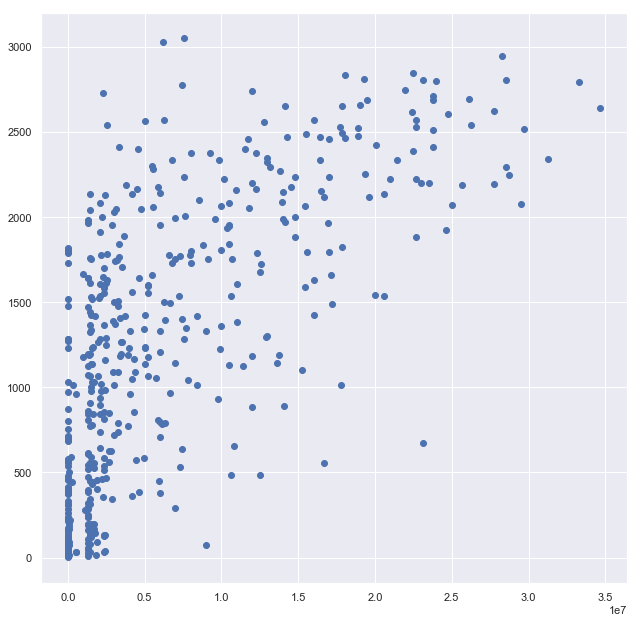

In [16]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["MP"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

#Minutes Played

In [22]:
reg = linear_model.LinearRegression()
reg.fit(nba[['Player Salary']], nba['Age'])

reg.coef_

array([8.52730588e-08])

In [23]:
mod = sm.OLS(b, a).fit()
predictions = mod.predict(x)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1075.
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          4.07e-125
Time:                        12:41:35   Log-Likelihood:                -3955.0
No. Observations:                 486   AIC:                             7912.
Df Residuals:                     485   BIC:                             7916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001    3.8e-06     32.785      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.660   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                5.367
Skew:                          -0.106   Prob(JB):                       0.0683
Kurtosis:                       3.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
salarybyposition = nba[['Player Salary', 'Pos', 'Player Name']]
salarybyposition.sort_values(by='Player Salary', ascending=False)
salarybyposition.head()

,Player Salary,Pos,Player Name
0,1312611.0,C,A.J. Hammons
1,2116955.0,PG,Aaron Brooks
2,5504420.0,SF,Aaron Gordon
3,0.0,SG,Aaron Harrison
4,0.0,PF,Adreian Payne


In [25]:
poscount = nba.Pos
poscounter = Counter(poscount)
count = pd.DataFrame.from_dict(poscounter, orient='index')
count.head()

,0
C,96
PG,96
SF,90
SG,106
PF,97


In [26]:
mod = sm.OLS(b, a).fit()
predictions = mod.predict(x)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1075.
Date:                Thu, 14 Feb 2019   Prob (F-statistic):          4.07e-125
Time:                        12:41:36   Log-Likelihood:                -3955.0
No. Observations:                 486   AIC:                             7912.
Df Residuals:                     485   BIC:                             7916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001    3.8e-06     32.785      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.660   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                5.367
Skew:                          -0.106   Prob(JB):                       0.0683
Kurtosis:                       3.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

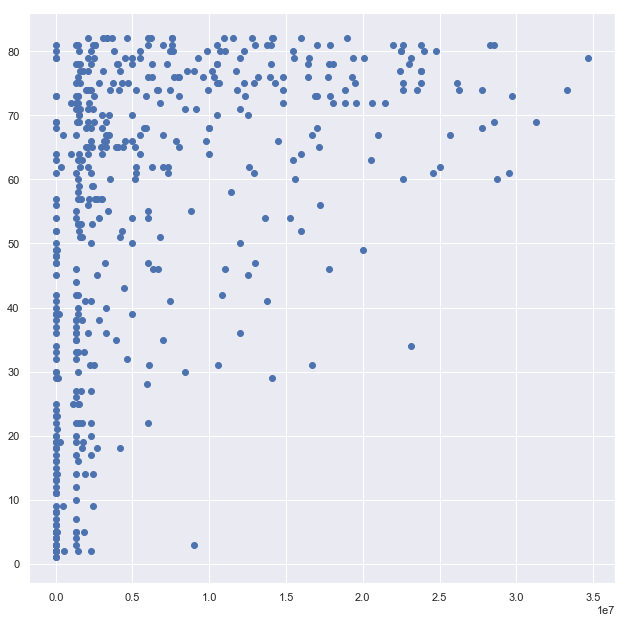

In [15]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["G"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

#Games

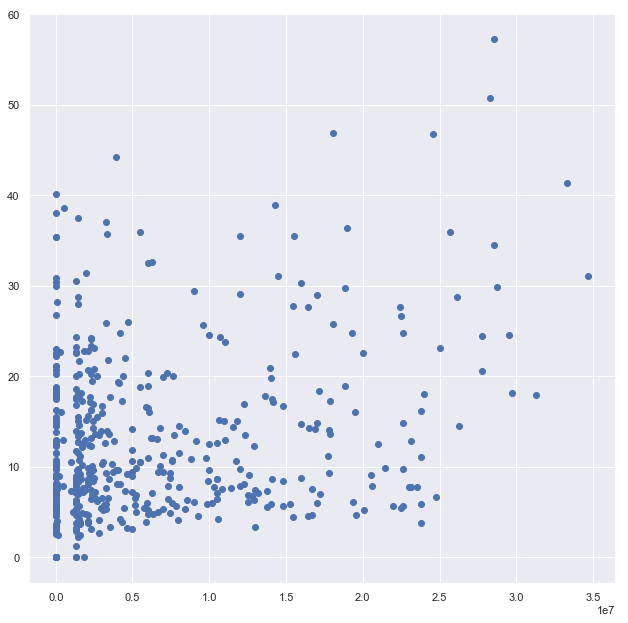

In [17]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["AST%"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

#Assists %

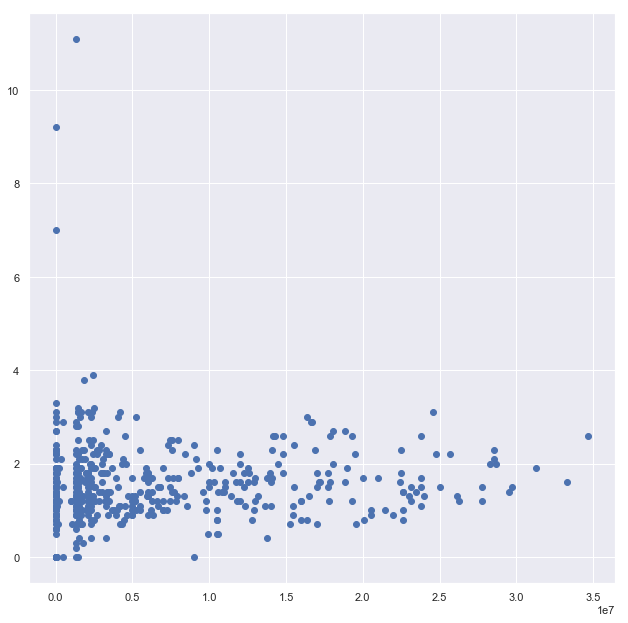

In [18]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["STL%"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

#Steals %

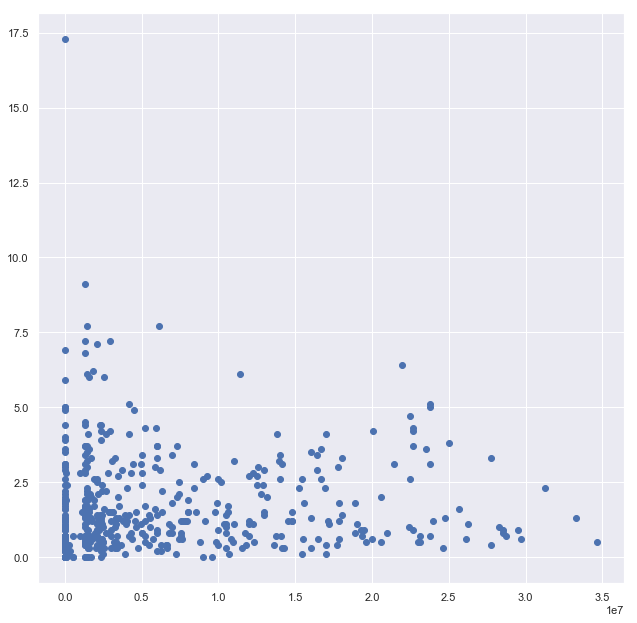

In [19]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["BLK%"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

#Blocks %

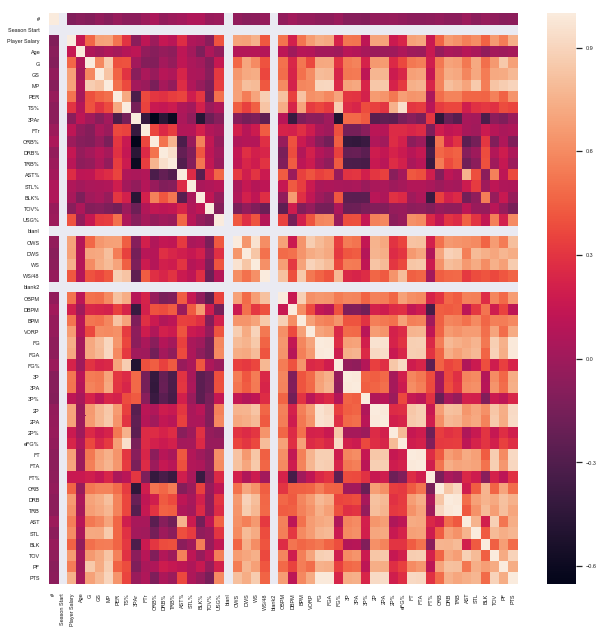

In [27]:
corr = nba.corr()
sns.heatmap(corr)

# Boxplot

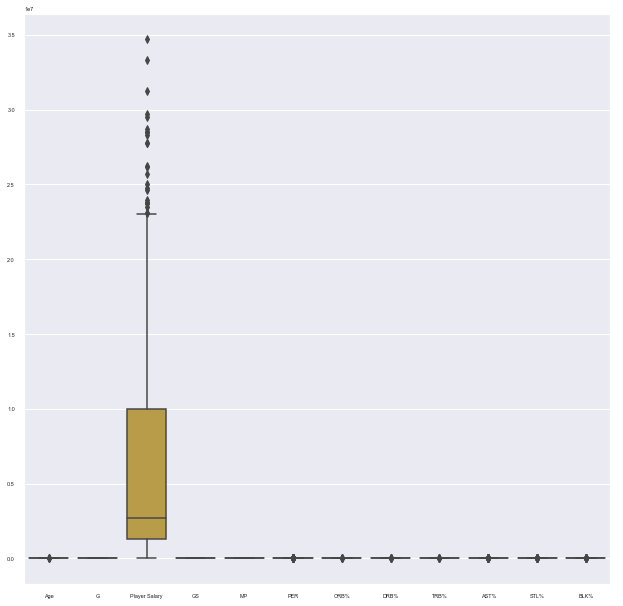

In [28]:
sns.boxplot(data=nbanum)

# Violin Plot

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


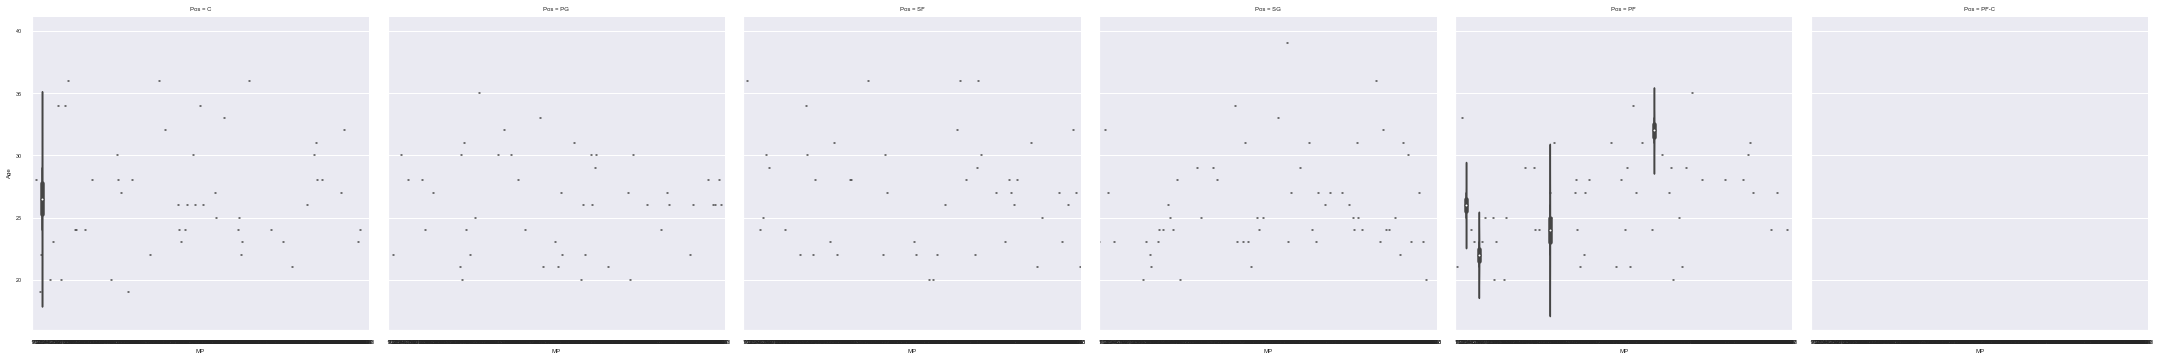

In [29]:
g = sns.catplot(x='MP', 
                   y='Age', 
                   data=nba, 
                   col='Pos',
                   kind='violin')
 
# Rotate x-axis labels
g.set_xticklabels(rotation=0)

# Distplot

C:\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Anaconda\Anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


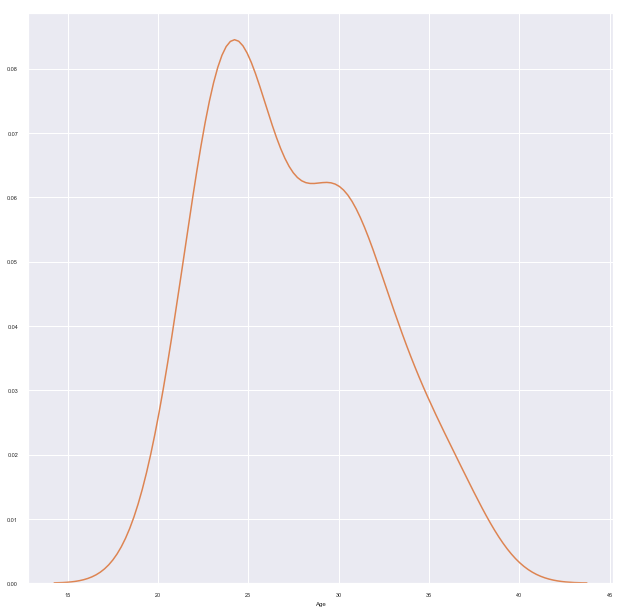

In [30]:
x = nba['Age'].loc[nba['Player Salary'] == 1]
y = nba['Age'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True)
sns.distplot(y, hist = False, kde = True)

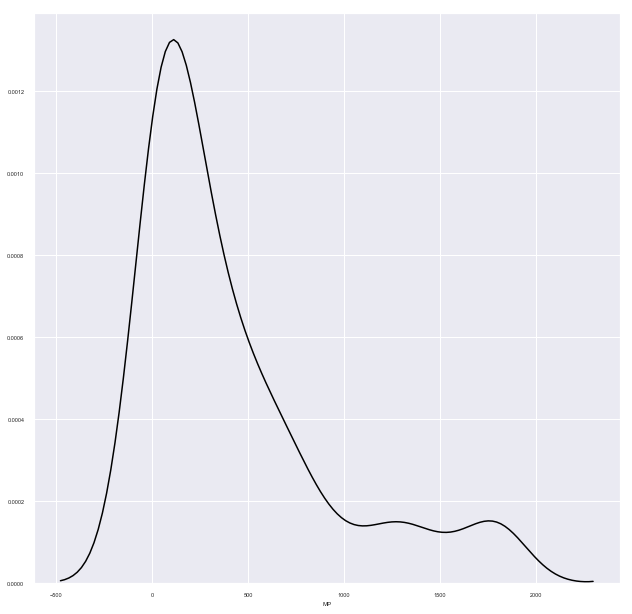

In [31]:
x = nba['MP'].loc[nba['Player Salary'] == 1]
y = nba['MP'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True, color='black')
sns.distplot(y, hist = False, kde = True, color='black')

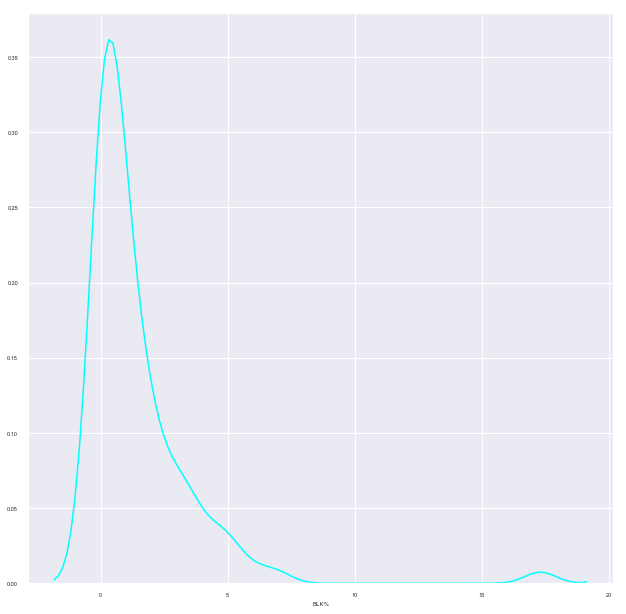

In [32]:
x = nba['BLK%'].loc[nba['Player Salary'] == 1]
y = nba['BLK%'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True, color='cyan')
sns.distplot(y, hist = False, kde = True, color='cyan')

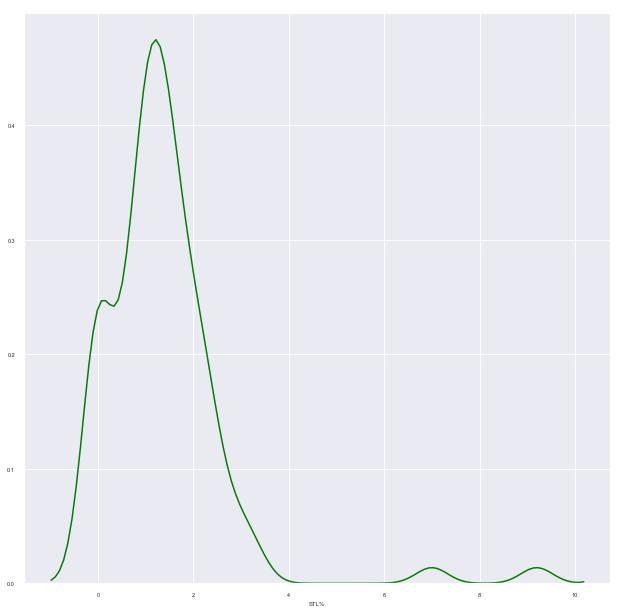

In [33]:
x = nba['STL%'].loc[nba['Player Salary'] == 1]
y = nba['STL%'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True, color='green')
sns.distplot(y, hist = False, kde = True, color='green')

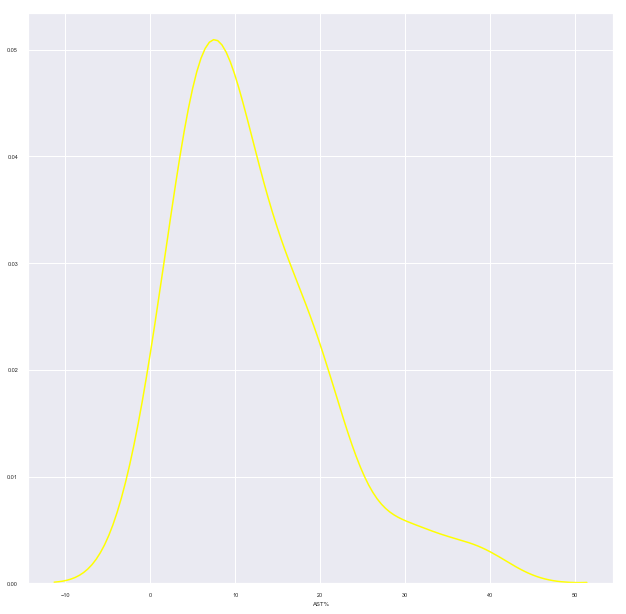

In [65]:
x = nba['AST%'].loc[nba['Player Salary'] == 1]
y = nba['AST%'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True, color='yellow')
sns.distplot(y, hist = False, kde = True, color='yellow')

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


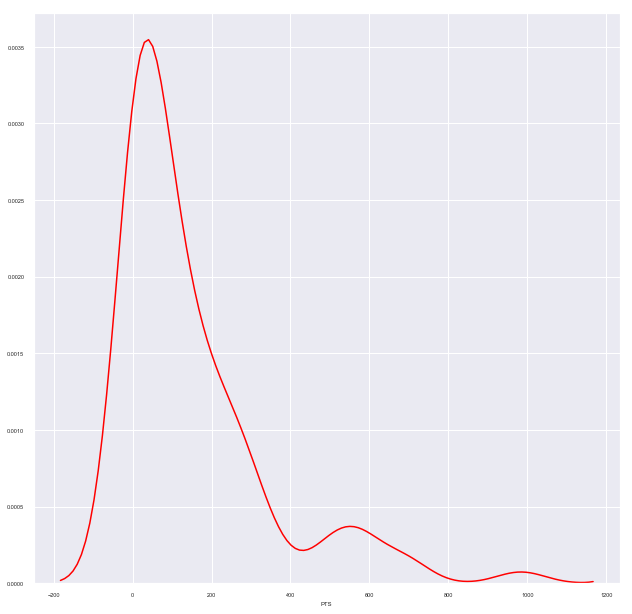

In [64]:
x = nba['PTS'].loc[nba['Player Salary'] == 1]
y = nba['PTS'].loc[nba['Player Salary'] == 0]

sns.distplot(x, hist = False, kde = True, color='red')
sns.distplot(y, hist = False, kde = True, color='red')

# Clustering

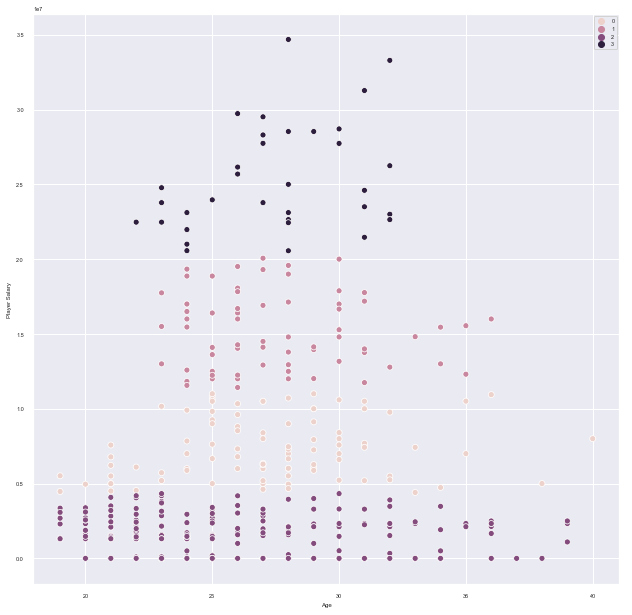

In [62]:
x = nbanum.loc[:, "Age" :]
y = nbanum["Player Salary"].values.reshape(-1,1)

clusters = KMeans(n_clusters=4).fit_predict(x)

sns.scatterplot(x['Age'], x['Player Salary'], hue=clusters) 

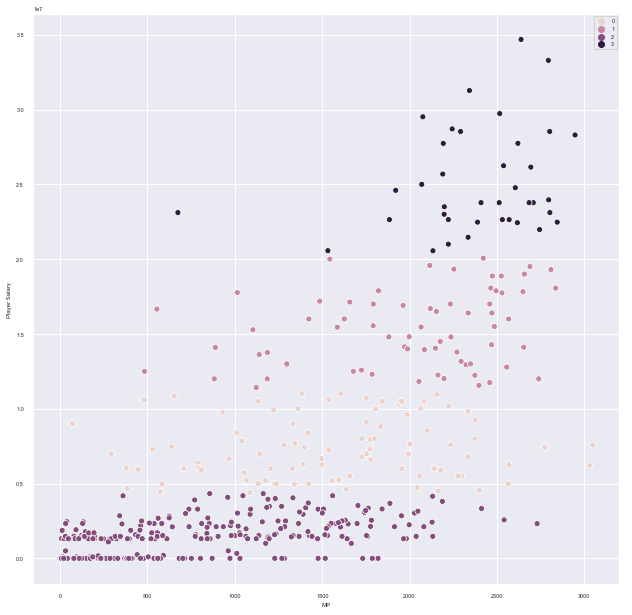

In [63]:
sns.scatterplot(x['MP'], x['Player Salary'], hue=clusters) 

# Expectation-maximization clustering

In [37]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs), )

In [38]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, vmin=0, vmax=.2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2).set_ylim(top=.2, bottom = 0, vmin=0, vmax=.2)
        
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [39]:
nbafeatures = nbanum.loc[:, 'Age':]
nbalabel = nbanum[['Player Salary']]

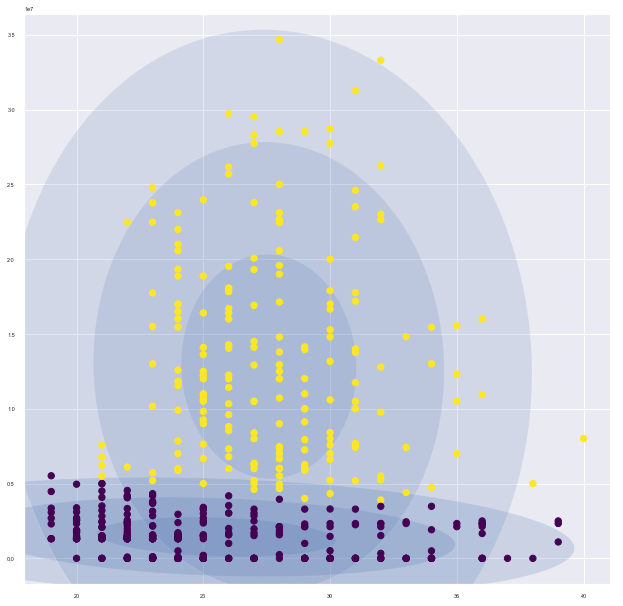

In [40]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(nbafeatures[['Age', 'Player Salary']])

plot_gmm(gmm, np.array(nbafeatures[['Age', 'Player Salary']]))

# Mean-Shift Clustering

In [41]:
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(nbafeatures, quantile=0.8)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#ms.fit(cancer_features[['mean radius', 'mean smoothness']])
ms.fit(nbafeatures)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [42]:
# Add the centers to a dataframe
centers_df = pd.DataFrame(cluster_centers).head()
# centers_df.columns = ['x', 'y']
centers_df['x'] = centers_df[0]
centers_df['y'] = centers_df[2]
centers_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,x,y
0,26.287081,50.925837,3.832619e+06,19.019139,1052.057416,12.011244,5.054067,14.870335,9.964593,12.17512,1.52512,1.632297,26.287081,3.832619e+06


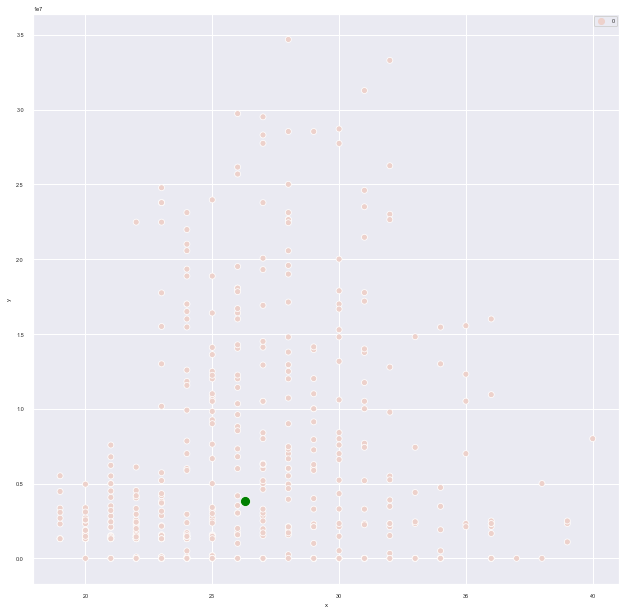

In [43]:
# Plot clusters in two dimensions and overlay the centers
sns.scatterplot(x='Age', y='Player Salary', data=nbafeatures, hue=labels)
sns.scatterplot(x='x', y='y', data=centers_df, color='green', s=100)

# Hierarchical clustering

In [56]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    #t0 = time()
    clustering.fit(nbafeatures[['Age', 'Player Salary']])
    #print("%s :\t%.2fs" % (linkage, time() - t0))

    sns.scatterplot(x='Age', y='Player Salary', data=nbafeatures, hue=clustering.labels_)
    plt.figure()

KeyError: "['Age'] not in index"

# PCA

In [20]:
nbafeatures = nbanum.iloc[:, 1:]
nbalabels = nbanum.iloc[:,0]

nbafeatures.head()

,G,Player Salary,GS,MP,PER,ORB%,DRB%,TRB%,AST%,STL%,BLK%
0,22,1312611.0,0,163,8.4,5.4,20.9,12.8,3.8,0.3,7.2
1,65,2116955.0,0,894,9.5,2.3,6.3,4.3,20.7,1.4,0.9
2,80,5504420.0,72,2298,14.4,5.3,14.1,9.6,10.5,1.4,1.4
3,5,0.0,0,17,-2.2,0.0,19.5,9.7,22.6,0.0,0.0
4,18,0.0,0,135,14.4,7.7,21.0,14.3,8.0,3.0,4.4


In [21]:
sc = StandardScaler()
nbafeatures_std = sc.fit_transform(nbafeatures)

nbafeatures_std = pd.DataFrame(nbafeatures_std)
nbafeatures_std.columns = nbafeatures_std.columns
nbafeatures_std.head()

C:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.281091,-0.667144,-0.882255,-1.259610,-0.802708,0.078284,0.776009,0.510870,-1.011381,-1.349964,3.277686
1,0.452076,-0.560807,-0.882255,-0.390997,-0.611620,-0.652466,-1.215833,-1.124848,0.832911,-0.157284,-0.452611
2,1.056670,-0.112972,1.627653,1.277312,0.239594,0.054712,-0.151698,-0.104930,-0.280212,-0.157284,-0.156556
3,-1.966296,-0.840676,-0.882255,-1.433095,-2.644109,-1.194636,0.585010,-0.085686,1.040258,-1.675240,-0.985511
4,-1.442315,-0.840676,-0.882255,-1.292881,0.239594,0.620454,0.789652,0.799526,-0.553036,1.577523,1.619776


In [22]:
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(nbafeatures)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = nbalabels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-5.046342e+06,672.436041,-4.708217,24
1,-4.241998e+06,2.512080,21.142841,32
2,-8.545331e+05,-1141.808877,-23.291590,21
3,-6.358953e+06,717.786844,-14.888359,22
4,-6.358953e+06,599.490179,-8.433706,25


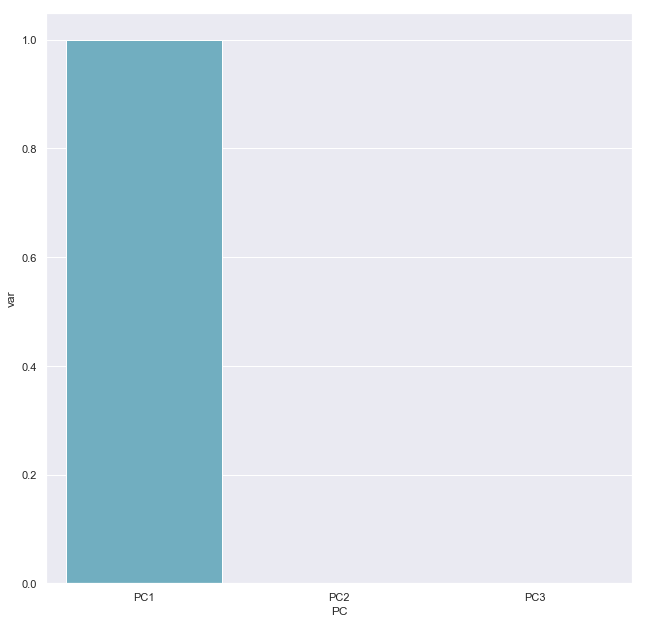

In [23]:
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")

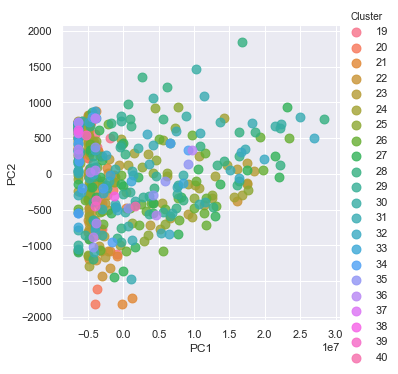

In [24]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [25]:
# Define number of principal components
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(nbafeatures_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = nbalabels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-1.778725,2.763709,-0.628381,24
1,-1.206861,-1.752590,0.161726,32
2,1.674545,-0.572797,-0.919715,21
3,-3.313107,-0.466958,-0.895311,22
4,-1.333446,2.318037,1.908466,25


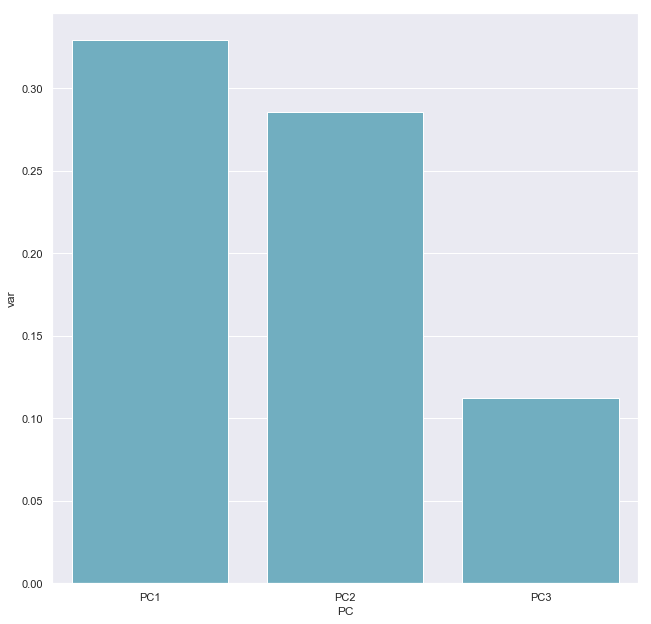

In [26]:
# Scree plot
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")

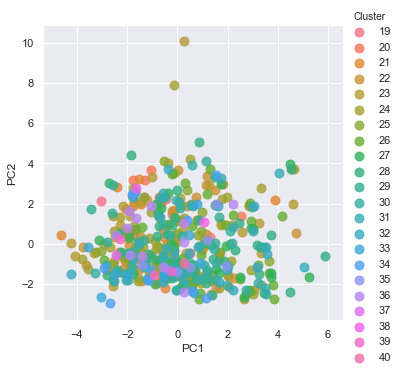

In [27]:
# Scatter plot of the first and second principal components (PC1, PC2) clustered by wine label
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

C:\Anaconda\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PCA Plot of first PCs')

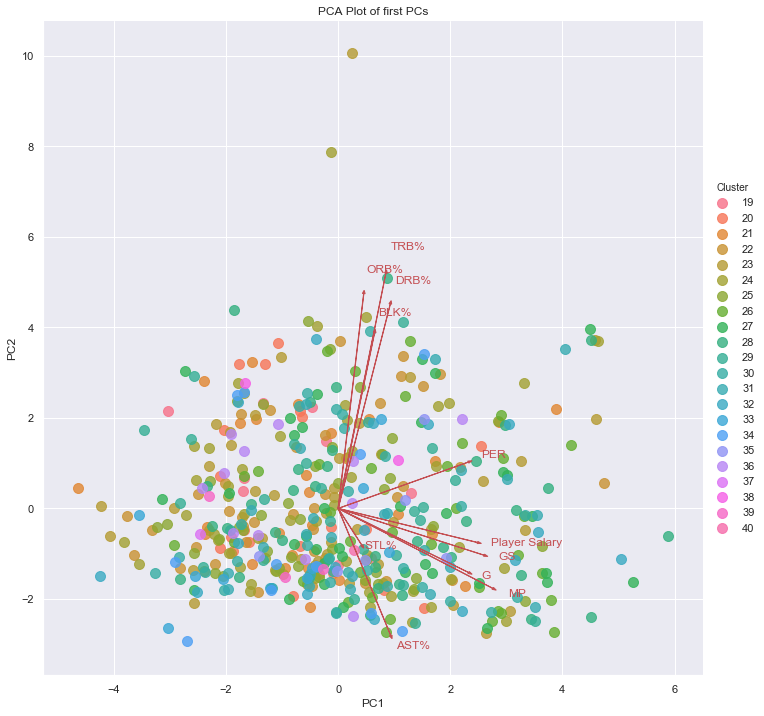

In [28]:
# PCA biplot
# Scatter plot based and assigned color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=pc_df, fit_reg = False, size=10, hue = 'Cluster', scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(nbafeatures_std)[:,0]
ys = pca.transform(nbafeatures_std)[:,1]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(nbafeatures.columns.values)[i], color='r')
 
plt.title('PCA Plot of first PCs')